In [73]:

import tensorflow as tf
print(tf.__version__)


2.18.0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
#divide dataset independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [77]:
X.head()
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [78]:
#feature enginiering 

geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)


In [79]:
#concadenate this wariables with dataframe
X=X.drop(["Geography","Gender"],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [80]:
X=pd.concat([X,gender,geography],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False


In [81]:
#splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [82]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
X_train = standart_scaler.fit_transform(X_train)
X_test = standart_scaler.transform(X_test)
X_train.shape


(8000, 11)

In [83]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [84]:
#part two: Let is create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout



In [85]:
#initialize ANN
classifier = Sequential()

In [86]:
#adding the input layer

classifier.add(Dense(units=11,activation='relu'))


In [87]:
#adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [88]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [89]:
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [90]:
import tensorflow as tf
#opt = optimizer

opt = tf.keras.optimizers.Adam(learning_rate=0.01)


In [91]:
#train our entire neural network
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy']) 

In [92]:
###Earlystopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [93]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,callbacks=early_stopping,epochs=1000)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8080 - loss: 0.4494 - val_accuracy: 0.8395 - val_loss: 0.3854
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8459 - loss: 0.3665 - val_accuracy: 0.8432 - val_loss: 0.3705
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.3355 - val_accuracy: 0.8538 - val_loss: 0.3586
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.3519 - val_accuracy: 0.8516 - val_loss: 0.3672
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8606 - loss: 0.3453 - val_accuracy: 0.8504 - val_loss: 0.3661
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8574 - loss: 0.3462 - val_accuracy: 0.8512 - val_loss: 0.3653
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8627 - loss: 0.3354 - val_accuracy: 0.8512 - val_loss: 0.3592
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8528 - loss: 0.3479 - 

In [94]:
model_history.history.keys()
   


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

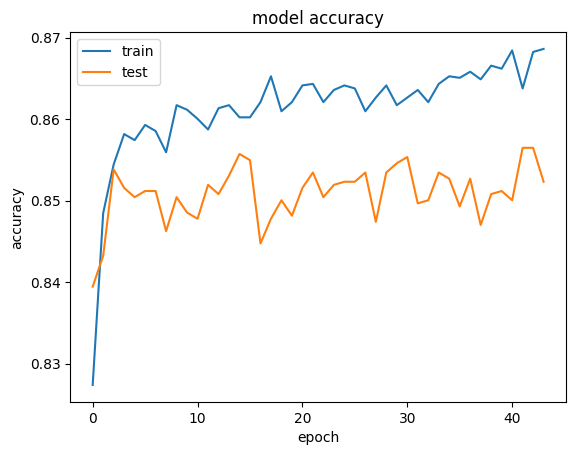

In [95]:
#summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

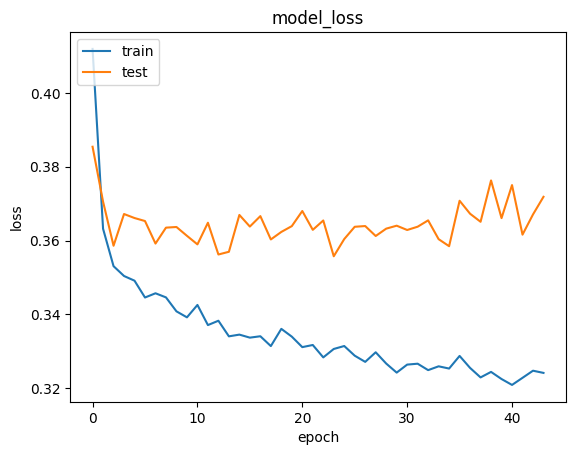

In [96]:
#summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [98]:
#Part-3 making the predictions and evaluating the model
#predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step


In [99]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm


array([[1509,   86],
       [ 205,  200]])

In [100]:
##calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score


0.8545

In [ ]:
#get the weights